In [1]:
import xlrd
import xlwt
import matplotlib.pyplot as plt
def generate_data(group, file_loc=r"16Mdata1.xls"):
    # X data generation
    excel = xlrd.open_workbook(file_loc)

    all_sheet = excel.sheets()

    # read all the data
    database = all_sheet[0]
    allresult = database.col_values(0)[3:]
    #print(len(allresult))
    allmatname = database.col_values(1)[3:]
    alldsq = database.col_values(2)[3:]
    alldv = database.col_values(3)[3:]
    allsqatom = database.col_values(8)[3:]
    for i in range(len(allsqatom)):
        if allsqatom[i] == 'D':
            allsqatom[i] = 'H'
    alladata = database.col_values(10)[3:]
    allcdata = database.col_values(11)[3:]
    allscdata = database.col_values(12)[3:]
    structure = database.col_values(13)[3:]
    
    # corrected labels
    #excelnew = xlrd.open_workbook(r"/Users/yanjunliu/Downloads/code_record/TSM/16Mdata1 (no_misfits).xls")
    excelnew = xlrd.open_workbook(r"CorrectedData2023.xls")
    all_sheetnew = excelnew.sheets()
    databasenew = all_sheetnew[0]
    allresultnew = databasenew.col_values(0)[3:]
    allmatnamenew = databasenew.col_values(1)[3:]
    alldsq = databasenew.col_values(2)[3:]
    alldv = databasenew.col_values(3)[3:]
    allsqatom = databasenew.col_values(8)[3:]
    for i in range(len(allsqatom)):
        if allsqatom[i] == 'D':
            allsqatom[i] = 'H'
    alladata = databasenew.col_values(10)[3:]
    allcdata = databasenew.col_values(11)[3:]
    allscdata = databasenew.col_values(12)[3:]
    structure = databasenew.col_values(13)[3:]
    # generate subgroup data based on different structure types
    oldresult = [[] for n in range(len(group))]
    result = [[] for n in range(len(group))]
    matname = [[] for n in range(len(group))]
    struc = [[] for n in range(len(group))]
    dsq = [[] for n in range(len(group))]
    dv = [[] for n in range(len(group))]
    sqatom = [[] for n in range(len(group))]
    adata = [[] for n in range(len(group))]
    cdata = [[] for n in range(len(group))]
    county=0
    special=[]
    ordnumber=[]
    mislist0=[]
    mislist1=[]
    for n in range(len(structure)):
        gui = 1
        if allmatname[n]!= allmatnamenew[n]:
            print(n,allmatname[n], allmatnamenew[n])
        if (allresult[n] == 'yes'):
            gui = 0
            for ll in range(2):
                for lll in range(len(group[ll])):
                    if structure[n] == group[ll][lll]:
                        gui = 1
            if gui == 0:
                ordnumber.append(n)
        for k in range(len(group)):
            tip=0
            for l in range(len(group[k])):
                if structure[n] == group[k][l]:
                    result[k].append(allresultnew[n])
                    oldresult[k].append(allresult[n])
                    if allresultnew[n][0]!=allresult[n][0]:
                        #print(allmatname[n], allresultnew[n], allresult[n])
                        if allresultnew[n][0]=='n':
                            mislist0.append(allmatname[n])
                        elif allresultnew[n][0]=='y':
                            mislist1.append(allmatname[n])
                    matname[k].append(allmatname[n])
                    struc[k].append(structure[n])
                    dsq[k].append(alldsq[n])
                    dv[k].append(alldv[n])
                    sqatom[k].append(allsqatom[n])
                    adata[k].append(alladata[n])
                    cdata[k].append(allcdata[n])
            if (k==1)and(gui==0):
                special.append(allmatname[n])
                result[k].append(allresultnew[n])
                oldresult[k].append(allresult[n])
                if allresultnew[n][0]!=allresult[n][0]:
                    #print(allmatname[n], allresultnew[n], allresult[n])
                    if allresultnew[n][0]=='n':
                        mislist0.append(allmatname[n])
                    elif allresultnew[n][0]=='y':
                        mislist1.append(allmatname[n])
                matname[k].append(allmatname[n])
                struc[k].append(structure[n])
                dsq[k].append(alldsq[n])
                dv[k].append(alldv[n])
                sqatom[k].append(allsqatom[n])
                adata[k].append(alladata[n])
                cdata[k].append(allcdata[n])
    # read atomic database
    excel1 = xlrd.open_workbook(r"atomic.xls")
    all_sheet1 = excel1.sheets()
    atomicdata = all_sheet1[0]
    ele1 = atomicdata.col_values(0)
    elene1 = atomicdata.col_values(1)
    elena1 = atomicdata.col_values(2)
    eleip1 = atomicdata.col_values(3)
    rcov1 = atomicdata.col_values(4)
    excel2 = xlrd.open_workbook(r"xenonpy.xls")
    all_sheet2 = excel2.sheets()
    xenondata = all_sheet2[0]
    polar = xenondata.col_values(57)
    fcc = xenondata.col_values(25)
    excel3 = xlrd.open_workbook(r"Econfig.xls")
    all_sheet3 = excel3.sheets()
    edata = all_sheet3[0]
    ele2 = edata.col_values(0)[1:]
    valence = edata.col_values(1)[1:]

    Xtot = []
    Ytot = []
    composition = []
    elist = []
    for i in range(len(group)):
        Xtot.append([])
        Ytot.append([])
        composition.append([])
        elist.append([])

    for n in range(len(group)):
        labels = [x[0] == "y" for x in result[n]]
        for i in range(len(matname[n])):
            elements = []
            ratio = []
            for j in range(len(matname[n][i])):
                if (j < len(matname[n][i]) - 1) and (matname[n][i][j] == r')') and (
                        ord(matname[n][i][j + 1]) > 47) and (
                        ord(matname[n][i][j + 1]) < 58):
                    print(i, matname[n][i])
                if (ord(matname[n][i][j]) > 64) & (ord(matname[n][i][j]) < 91):
                    ele = matname[n][i][j]
                    if j == (len(matname[n][i]) - 1):
                        rate = 1.
                    if j < (len(matname[n][i]) - 1):
                        if (ord(matname[n][i][j + 1]) > 96) & (ord(matname[n][i][j + 1]) < 123):
                            ele = ele + matname[n][i][j + 1]
                            if (j + 2 == len(matname[n][i])):
                                rate = 1.
                            elif ((ord(matname[n][i][j + 2]) > 64) & (ord(matname[n][i][j + 2]) < 91)) or (
                                    matname[n][i][j + 2] == r' ') or (matname[n][i][j + 2] == r'(') or (
                                    matname[n][i][j + 2] == r')'):
                                rate = 1.
                            else:
                                step = 2
                                string = ''
                                while (j + step < len(matname[n][i])) and ((ord(matname[n][i][j + step]) == 46) or (
                                        (ord(matname[n][i][j + step]) > 47) and (ord(matname[n][i][j + step]) < 58))):
                                    string = string + matname[n][i][j + step]
                                    step = step + 1
                                rate = float(string)
                        elif ((ord(matname[n][i][j + 1]) > 64) & (ord(matname[n][i][j + 1]) < 91)) or (
                                matname[n][i][j + 1] == r' ') or (matname[n][i][j + 1] == r'(') or (
                                matname[n][i][j + 1] == r')'):
                            rate = 1.
                        else:
                            step = 1
                            string = ''
                            while (j + step < len(matname[n][i])) and ((ord(matname[n][i][j + step]) == 46) or (
                                    (ord(matname[n][i][j + step]) > 47) and (ord(matname[n][i][j + step]) < 58))):
                                string = string + matname[n][i][j + step]
                                step = step + 1
                            rate = float(string)
                    rep = 0
                    for k in range(len(elements)):
                        if (elements[k] == ele):
                            rep = 1
                            ratio[k] = ratio[k] + rate
                    if (rep == 0):
                        elements.append(ele)
                        ratio.append(rate)
            composition[n].append(ratio)
            elist[n].append(elements)


            ea, ip, en, rc, ve, pl = [], [], [], [], [], []
            tv = 0.
            for j in range(len(elements)):
                for k in range(len(ele2)):
                    if elements[j] == ele2[k]:
                        tv = tv + float(ratio[j]) * float(valence[k])

            for j in range(len(elements)):
                for k in range(len(ele2)):
                    if elements[j] == ele2[k]:
                        pl.append(polar[k])
                        ve.append(valence[k])

            for j in range(len(elements)):
                for k in range(len(ele1)):
                    if (elements[j] == ele1[k]):
                        ip.append(eleip1[k])
                        ea.append(elena1[k])
                        en.append(elene1[k])
                        rc.append(rcov1[k])

            for k in range(len(ele1)):
                if sqatom[n][i] == ele1[k]:
                    ipsq = eleip1[k]
                    easq = elena1[k]
                    ensq = elene1[k]
                    rcsq = rcov1[k]

            for k in range(len(ele2)):
                if sqatom[n][i] == ele2[k]:
                    plsq = polar[k]
                    vesq = valence[k]
                    fccsq = fcc[k]
            #print(matname[n][i],elements,sqatom[n][i])

            #datapoint = [max(en), min(en), ensq, max(pl), min(pl), plsq, max(ve), min(ve), vesq, tv,
                         #dsq[n][i], dv[n][i], fccsq, max(ea), min(ea), easq]
            datapoint = [max(en), min(en), ensq, max(ve), min(ve), vesq, tv, dsq[n][i], dv[n][i],
                         fccsq, max(ea), min(ea), easq]
            #if (dsq[n][i] > 2.25) and (dsq[n][i] < 3.75) and (dv[n][i] < 3.5) and (cdata[n][i] < 15.) and (max(rc) < 220) and (
                    #min(rc) > 40):
            Xtot[n].append(datapoint)
            Ytot[n].append(labels[i])

        #print(len(Xtot[n]), len(Xtot[n][0]))

        print('group',n, len(Xtot[n]),'materials')

   
            
    for i in range(12):
        mean1 = 0
        for d in range(2):
            for j in range(len(Xtot[d])):
                mean1 = mean1 + Xtot[d][j][i]
        mean1 = mean1/float(len(Xtot[0])+len(Xtot[1]))

    mean1 = mean1 / float(len(Xtot[n]))

    
    #print(Ytot[0][-1],Ytot[0][-2],Ytot[0][-3])
    X1 = [[] for i in range(len(group))]
    X0 = [[] for i in range(len(group))]
    mat1 = [[] for i in range(len(group))]
    struc1 = [[] for i in range(len(group))]
    mat0 = [[] for i in range(len(group))]
    struc0 = [[] for i in range(len(group))]
    for n in range(len(group)):
        count1 = 0
        count0 = 0
        for i in range(len(Ytot[n])):
            if Ytot[n][i] == 1:
                X1[n].append(Xtot[n][i])
                mat1[n].append(matname[n][i])
                struc1[n].append(struc[n][i])
                count1 = count1 + 1
            else:
                X0[n].append(Xtot[n][i])
                mat0[n].append(matname[n][i])
                struc0[n].append(struc[n][i])
                count0 = count0 + 1
        #print(n, count1, count0)
        
    
    """for j in range(len(X1[0][0])):
        buffer=[]
        for n in range(2):
            for i in range(len(X1[n])):
                buffer.append(X1[n][i][j])
            for i in range(len(X0[n])):
                buffer.append(X0[n][i][j])
        min1=np.min(buffer)
        mean1=np.mean(buffer)
        std1=np.std(buffer)
        len1=np.max(buffer)-np.min(buffer)
        print(j,'len',len1)
        for n in range(2):
            for i in range(len(X1[n])):
                X1[n][i][j]-=mean1
                X1[n][i][j]/=std1
            for i in range(len(X0[n])):
                X0[n][i][j]-=mean1
                X0[n][i][j]/=std1"""
    

    return X1, X0, mat1, mat0, fcc, special, struc1, struc0, mislist0, mislist1

In [2]:

import numpy as np
group=[['PbFCl','ZrSiS-UP2','ZrSiTe','AmTe2-x','PrOI','Cu2Sb'],['ZrCuSiAs-HfCuSi2','LaZn0.5Sb2'],['CaBe2Ge2']]
mislist=[]
X1list, X0list, name1, name0, fcc, special, struc1, struc0, mislist0, mislist1=generate_data(group)
X1=[]
mat1=[]
str1=[]
X1.extend(X1list[0])
X1.extend(X1list[1])
mat1.extend(name1[0])
mat1.extend(name1[1])
str1.extend(struc1[0])
str1.extend(struc1[1])
#X1.extend(X1list[2])
#mat1.extend(name1[2])
X0=[]
mat0=[]
str0=[]
X0.extend(X0list[0])
X0.extend(X0list[1])
mat0.extend(name0[0])
mat0.extend(name0[1])
str0.extend(struc0[0])
str0.extend(struc0[1])
#X0.extend(X0list[2])
#mat0.extend(name0[2])

# primary feature order:  datapoint = [max(en), min(en), ensq, max(Ne), min(Ne), Nesq, Netot, dsq[n][i], dv[n][i],
#                         fccsq, max(ea), min(ea), easq]

x1x=[]
x1y=[]
x1z=[]
x0x=[]
x0y=[]
x0z=[]
s1x=[]
s1y=[]
s0x=[]
s0y=[]
count1=0
count0=0
print('')
for i in range(len(X1)):
    mark=0
    for j in range(len(mislist1)):
        if (mat1[i]==mislist1[j]):
            count1+=1
            s1x.append(X1[i][7]/X1[i][8])
            s1y.append(X1[i][2]*X1[i][9])
            mark=1
    if mark==0:
        x1x.append(X1[i][7]/X1[i][8])
        x1y.append(X1[i][2]*X1[i][9])
    
    
    
print('')
count=0
for i in range(len(X0)):
    x0z.append(X0[i][9])
    mark=0
    for j in range(len(mislist0)):
        if (mat0[i]==mislist0[j]):
            count0+=1
            s0x.append(X0[i][7]/X0[i][8])
            s0y.append(X0[i][2]*X0[i][9])
            mark=1
    if mark==0:
        x0x.append(X0[i][7]/X0[i][8])
        x0y.append(X0[i][2]*X0[i][9])
        



group 0 483 materials
group 1 396 materials
group 2 201 materials




In [3]:
print(len(x0x)+len(x1x),'data points')


847 data points


In [4]:
print(len(s0x)+len(s1x),'corrected data points')


48 corrected data points


In [5]:
847+48

895

879 data points


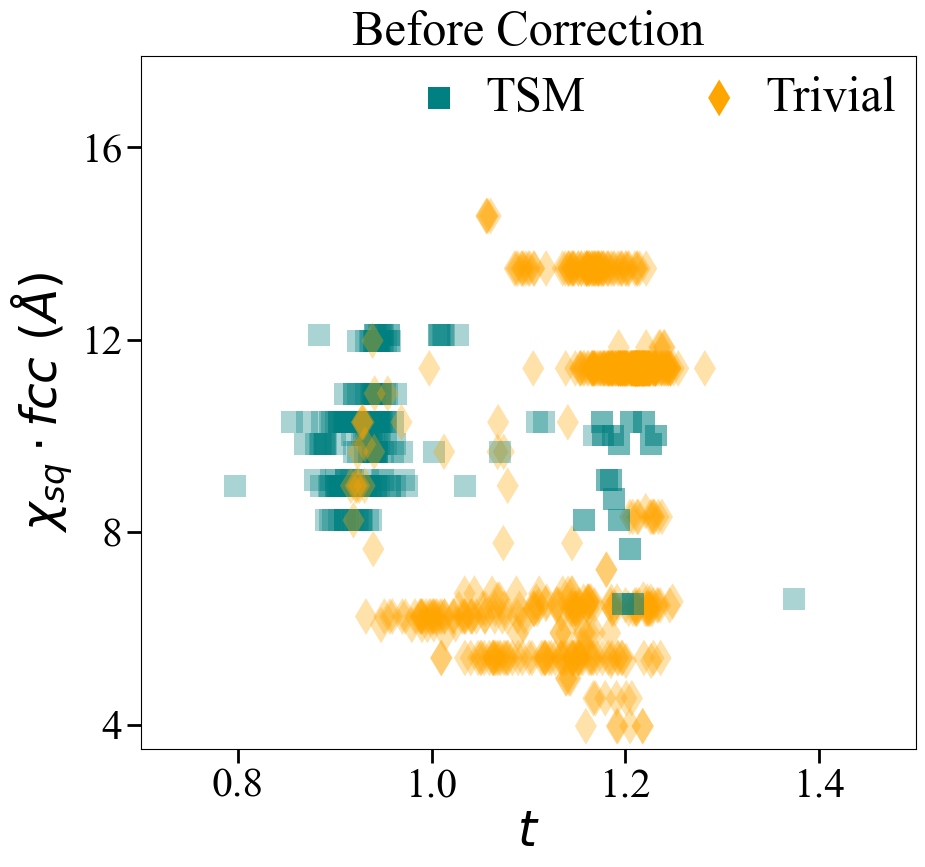

In [6]:
plt.figure(figsize=(10,9))
#plt.scatter(x0,y0,c='red',s=5)
#plt.scatter(x1,y1,c='blue',s=5)
plt.rcParams['font.family']='Times New Roman'
ax=plt.gca()
#ax.spines['bottom'].set_linewidth(2)
#ax.spines['top'].set_linewidth(2)
#ax.spines['right'].set_linewidth(2)
#ax.spines['left'].set_linewidth(2)
plt.scatter(x1x,x1y,c='teal',s=250,alpha=1/3,edgecolor='none',marker='s')
plt.scatter(x0x,x0y,c='orange',s=350,alpha=1/3, edgecolor='none',marker='d')
#plt.scatter(s1x,s1y,c='orange',alpha=1, zorder=2, s=30)
#plt.scatter(s0x,s0y,c='teal',alpha=1, zorder=2, s=30)


plt.scatter(s0x,s0y,c='teal',s=250,alpha=1/3, edgecolor='none',marker='s')
plt.scatter(s1x,s1y,c='orange',s=350,alpha=1/3, edgecolor='none',marker='d')


#plt.scatter(s1x,s1y,c='#2adb62',alpha=1, zorder=2, s=250, marker='s',edgecolor='green')

#plt.scatter(s0x,s0y,c='#b3591d',alpha=1, zorder=2, s=350, marker='d',edgecolor='brown')

plt.scatter(1000,1000,c='teal',s=250,alpha=1, zorder=1,edgecolor='none',marker='s',label='TSM')
#plt.scatter(1000,1000,c='#2adb62',alpha=1, zorder=3, s=250, marker='s',edgecolor='green',label='corrected')

plt.scatter(1000,1000,c='orange',s=350,alpha=1, zorder=2,edgecolor='none',marker='d',label='Trivial')
#plt.scatter(1000,1000,c='#b3591d',alpha=1, zorder=4, s=350, marker='d',edgecolor='brown',label='corrected')


#plt.scatter([0.8],[14],c='#2adb62',alpha=1, zorder=2, s=80, marker='*')
#plt.text(0.8,14.5,'TSM',size=20,color='teal')
#plt.text(0.8,13.8,'Trivial',size=20,color='orange')

plt.xlabel(r'$t$',size=35)
plt.ylabel(r'$\chi_{sq}\cdot fcc~ (\AA)$',size=35)
plt.title(r'Before Correction',size=35)
plt.yticks(np.arange(4,16.1,4),size=30)
plt.tick_params(length=10, width=2, labelsize=30)
plt.ylim([3.5,17.9])
plt.xlim([0.7,1.5])

plt.legend(frameon=False,fontsize=35,ncols=2,labelspacing=0.3,handlelength=1.5,handletextpad=0.2,borderaxespad=0.01)

#plt.show()
#plt.savefig(r'Uncorrected_2d_scatter.svg',bbox_inches='tight',transparent='true')
print(len(X1)+len(X0),'data points')
#print(count1, count0)

879 data points


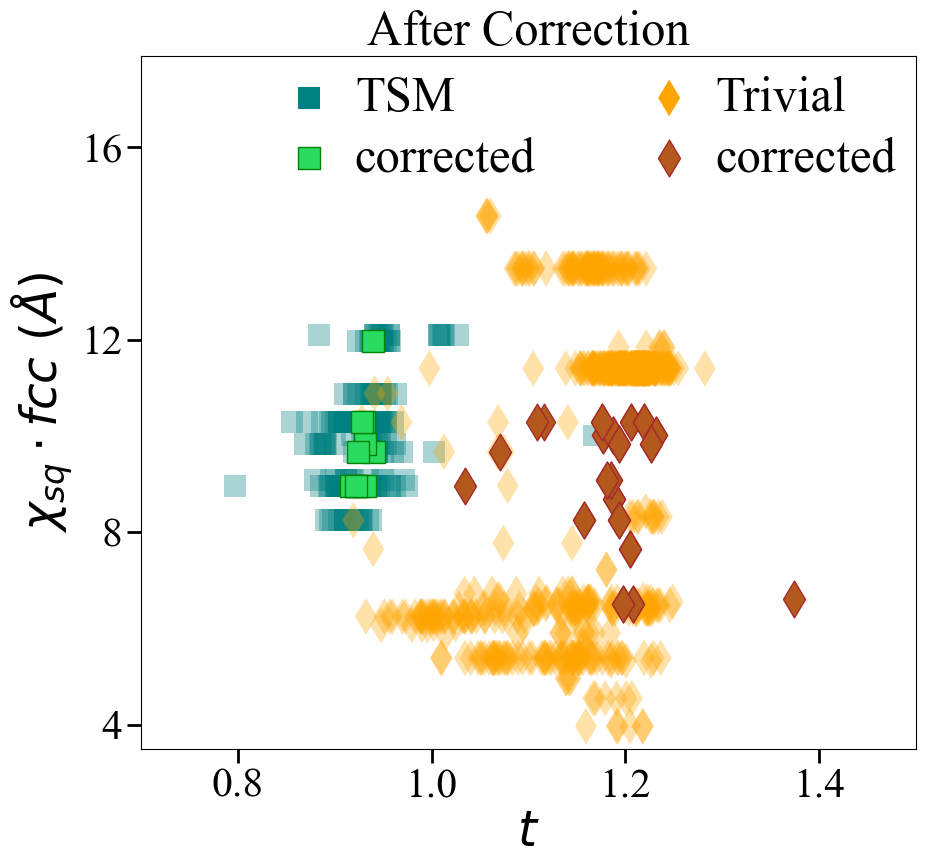

In [7]:
plt.figure(figsize=(10,9))
#plt.scatter(x0,y0,c='red',s=5)
#plt.scatter(x1,y1,c='blue',s=5)
plt.rcParams['font.family']='Times New Roman'
ax=plt.gca()
#ax.spines['bottom'].set_linewidth(2)
#ax.spines['top'].set_linewidth(2)
#ax.spines['right'].set_linewidth(2)
#ax.spines['left'].set_linewidth(2)
plt.scatter(x1x,x1y,c='teal',s=250,alpha=1/3,edgecolor='none',marker='s')
plt.scatter(x0x,x0y,c='orange',s=350,alpha=1/3, edgecolor='none',marker='d')
#plt.scatter(s1x,s1y,c='orange',alpha=1, zorder=2, s=30)
#plt.scatter(s0x,s0y,c='teal',alpha=1, zorder=2, s=30)



plt.scatter(s1x,s1y,c='#2adb62',alpha=1, zorder=2, s=250, marker='s',edgecolor='green')

plt.scatter(s0x,s0y,c='#b3591d',alpha=1, zorder=2, s=350, marker='d',edgecolor='brown')

plt.scatter(1000,1000,c='teal',s=250,alpha=1, zorder=1,edgecolor='none',marker='s',label='TSM')
plt.scatter(1000,1000,c='#2adb62',alpha=1, zorder=3, s=250, marker='s',edgecolor='green',label='corrected')

plt.scatter(1000,1000,c='orange',s=350,alpha=1, zorder=2,edgecolor='none',marker='d',label='Trivial')
plt.scatter(1000,1000,c='#b3591d',alpha=1, zorder=4, s=350, marker='d',edgecolor='brown',label='corrected')


#plt.scatter([0.8],[14],c='#2adb62',alpha=1, zorder=2, s=80, marker='*')
#plt.text(0.8,14.5,'TSM',size=20,color='teal')
#plt.text(0.8,13.8,'Trivial',size=20,color='orange')

plt.xlabel(r'$t$',size=35)
plt.ylabel(r'$\chi_{sq}\cdot fcc~ (\AA)$',size=35)
plt.title(r'After Correction',size=35)
plt.yticks(np.arange(4,16.1,4),size=30)
plt.tick_params(length=10, width=2, labelsize=30)
plt.ylim([3.5,17.9])
plt.xlim([0.7,1.5])

plt.legend(frameon=False,fontsize=35,ncols=2,labelspacing=0.3,handlelength=1.5,handletextpad=0.2,borderaxespad=0.01)

#plt.show()
#plt.savefig(r'Corrected_2d_scatter.svg',bbox_inches='tight',transparent='true')
print(len(X1)+len(X0),'data points')
#print(count1, count0)

879 data points


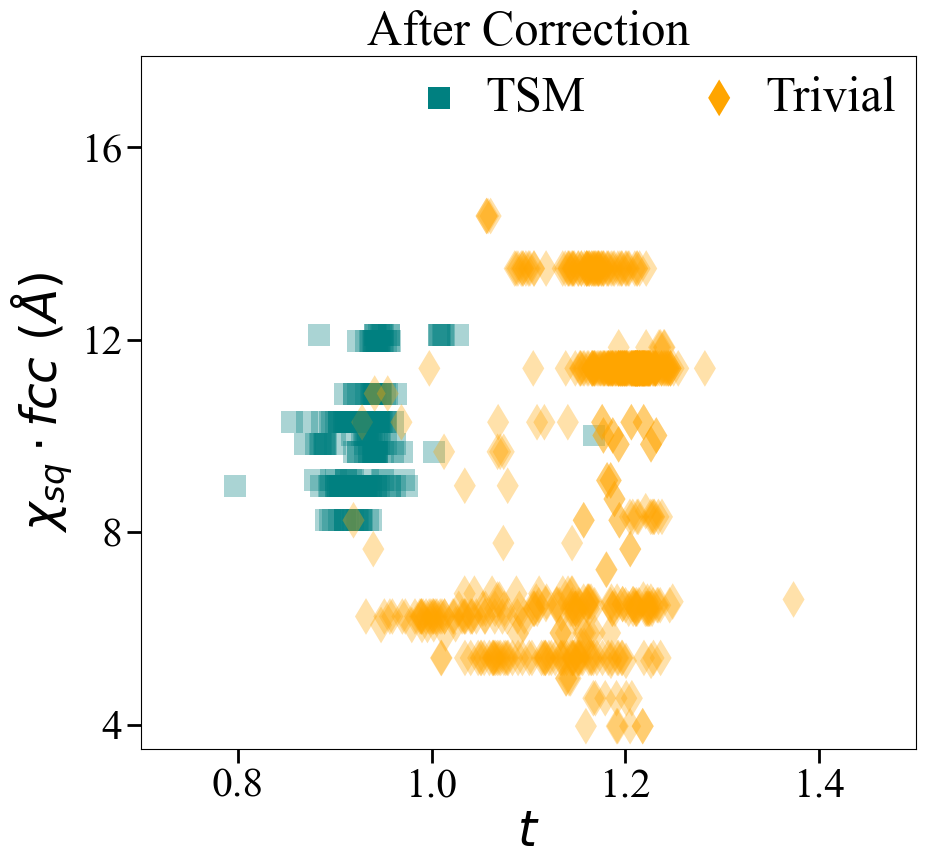

In [8]:
plt.figure(figsize=(10,9))
#plt.scatter(x0,y0,c='red',s=5)
#plt.scatter(x1,y1,c='blue',s=5)
plt.rcParams['font.family']='Times New Roman'
ax=plt.gca()
#ax.spines['bottom'].set_linewidth(2)
#ax.spines['top'].set_linewidth(2)
#ax.spines['right'].set_linewidth(2)
#ax.spines['left'].set_linewidth(2)
plt.scatter(x1x,x1y,c='teal',s=250,alpha=1/3,edgecolor='none',marker='s')
plt.scatter(x0x,x0y,c='orange',s=350,alpha=1/3, edgecolor='none',marker='d')
plt.scatter(s1x,s1y,c='teal',alpha=1/3, zorder=2, s=250, marker='s',edgecolor='none')

plt.scatter(s0x,s0y,c='orange',alpha=1/3, zorder=2, s=350, marker='d',edgecolor='none')



#plt.scatter(s1x,s1y,c='orange',alpha=1, zorder=2, s=30)
#plt.scatter(s0x,s0y,c='teal',alpha=1, zorder=2, s=30)




plt.scatter(1000,1000,c='teal',s=250,alpha=1, zorder=1,edgecolor='none',marker='s',label='TSM')

#plt.scatter(1000,1000,c='#2adb62',alpha=1, zorder=3, s=250, marker='s',edgecolor='green',label='corrected')

plt.scatter(1000,1000,c='orange',s=350,alpha=1, zorder=2,edgecolor='none',marker='d',label='Trivial')
#plt.scatter(1000,1000,c='#b3591d',alpha=1, zorder=4, s=350, marker='d',edgecolor='brown',label='corrected')


#plt.scatter([0.8],[14],c='#2adb62',alpha=1, zorder=2, s=80, marker='*')
#plt.text(0.8,14.5,'TSM',size=20,color='teal')
#plt.text(0.8,13.8,'Trivial',size=20,color='orange')

plt.xlabel(r'$t$',size=35)
plt.ylabel(r'$\chi_{sq}\cdot fcc~ (\AA)$',size=35)
plt.title(r'After Correction',size=35)
plt.yticks(np.arange(4,16.1,4),size=30)
plt.tick_params(length=10, width=2, labelsize=30)
plt.ylim([3.5,17.9])
plt.xlim([0.7,1.5])

plt.legend(frameon=False,fontsize=35,ncols=2,labelspacing=0.3,handlelength=1.5,handletextpad=0.2,borderaxespad=0.01)

#plt.show()
#plt.savefig(r'Corrected_2d_scatter.svg',bbox_inches='tight',transparent='true')
print(len(X1)+len(X0),'data points')
#print(count1, count0)

In [20]:
len(s0x)+len(s1x)

48

879 data points


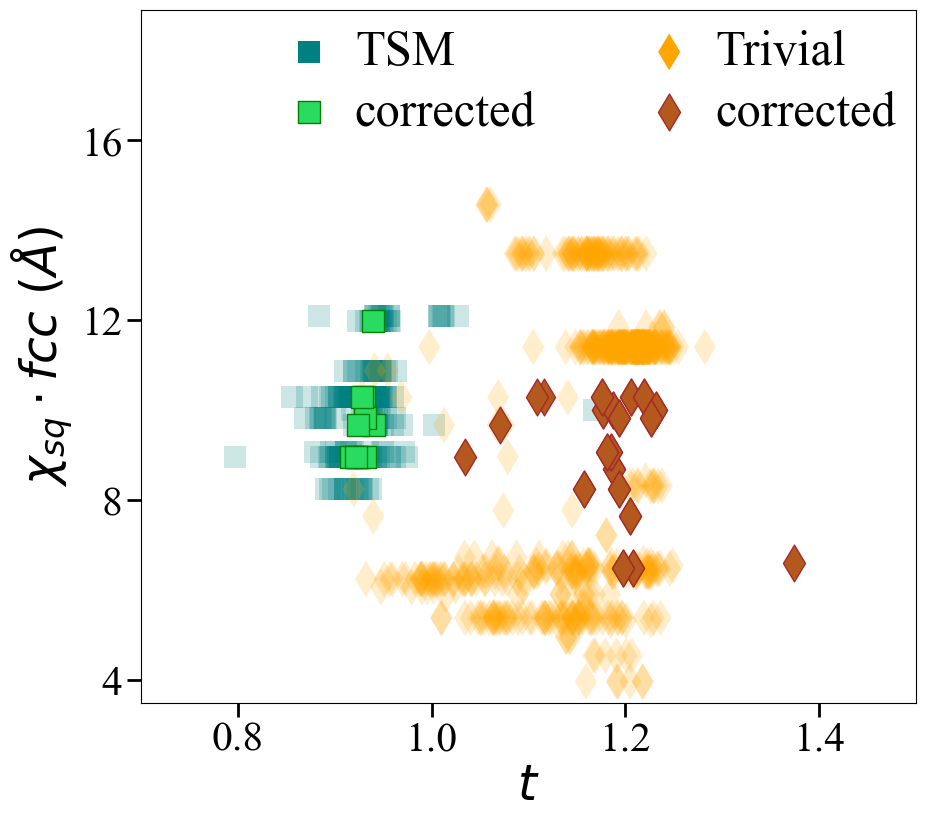

In [3]:
plt.figure(figsize=(10,9))
#plt.scatter(x0,y0,c='red',s=5)
#plt.scatter(x1,y1,c='blue',s=5)
plt.rcParams['font.family']='Times New Roman'
ax=plt.gca()
#ax.spines['bottom'].set_linewidth(2)
#ax.spines['top'].set_linewidth(2)
#ax.spines['right'].set_linewidth(2)
#ax.spines['left'].set_linewidth(2)
plt.scatter(x1x,x1y,c='teal',s=250,alpha=1/5, zorder=1,edgecolor='none',marker='s')
plt.scatter(x0x,x0y,c='orange',s=350,alpha=1/5, zorder=2,edgecolor='none',marker='d')
#plt.scatter(s1x,s1y,c='orange',alpha=1, zorder=2, s=30)
#plt.scatter(s0x,s0y,c='teal',alpha=1, zorder=2, s=30)

plt.scatter(s1x,s1y,c='#2adb62',alpha=1, zorder=2, s=250, marker='s',edgecolor='green')

plt.scatter(s0x,s0y,c='#b3591d',alpha=1, zorder=2, s=350, marker='d',edgecolor='brown')

plt.scatter(1000,1000,c='teal',s=250,alpha=1, zorder=1,edgecolor='none',marker='s',label='TSM')
plt.scatter(1000,1000,c='#2adb62',alpha=1, zorder=3, s=250, marker='s',edgecolor='green',label='corrected')

plt.scatter(1000,1000,c='orange',s=350,alpha=1, zorder=2,edgecolor='none',marker='d',label='Trivial')
plt.scatter(1000,1000,c='#b3591d',alpha=1, zorder=4, s=350, marker='d',edgecolor='brown',label='corrected')


#plt.scatter([0.8],[14],c='#2adb62',alpha=1, zorder=2, s=80, marker='*')
#plt.text(0.8,14.5,'TSM',size=20,color='teal')
#plt.text(0.8,13.8,'Trivial',size=20,color='orange')

plt.xlabel(r'$t$',size=35)
plt.ylabel(r'$\chi_{sq}\cdot fcc~ (\AA)$',size=35)
plt.yticks(np.arange(4,16.1,4),size=30)
plt.tick_params(length=10, width=2, labelsize=30)
plt.ylim([3.5,18.9])
plt.xlim([0.7,1.5])

plt.legend(frameon=False,fontsize=35,ncols=2,labelspacing=0.3,handlelength=1.5,handletextpad=0.2,borderaxespad=0.01)

#plt.show()
plt.savefig(r'new2d_scatter2.svg',bbox_inches='tight',transparent='true')
print(len(X1)+len(X0),'data points')
#print(count1, count0)

879 data points


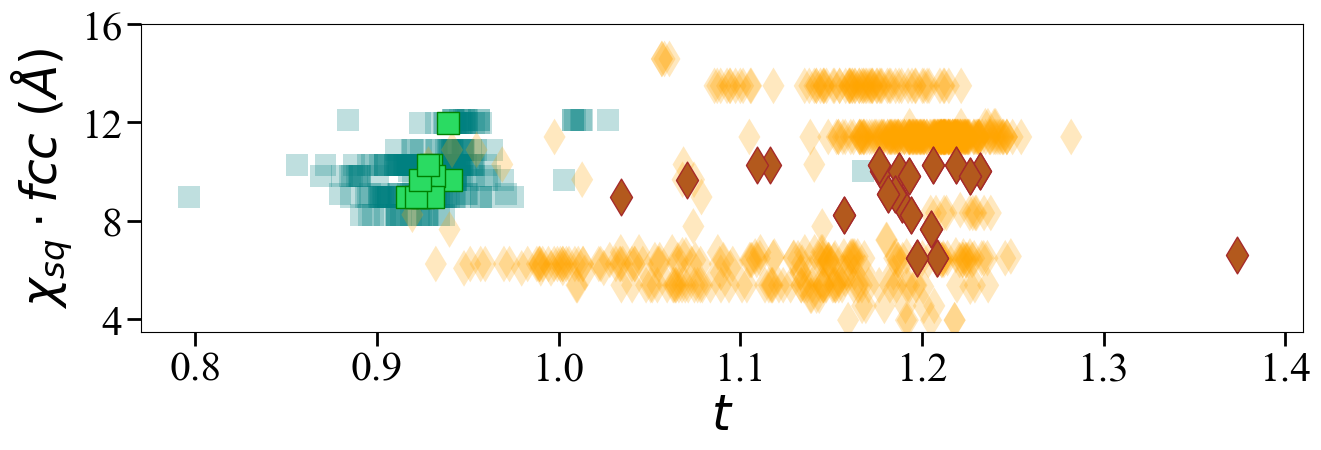

In [33]:
plt.figure(figsize=(15,4))
#plt.scatter(x0,y0,c='red',s=5)
#plt.scatter(x1,y1,c='blue',s=5)
plt.rcParams['font.family']='Times New Roman'
ax=plt.gca()
#ax.spines['bottom'].set_linewidth(2)
#ax.spines['top'].set_linewidth(2)
#ax.spines['right'].set_linewidth(2)
#ax.spines['left'].set_linewidth(2)
plt.scatter(x1x,x1y,c='teal',s=250,alpha=1/4, zorder=1,edgecolor='none',marker='s')
plt.scatter(x0x,x0y,c='orange',s=350,alpha=1/4, zorder=2,edgecolor='none',marker='d')
#plt.scatter(s1x,s1y,c='orange',alpha=1, zorder=2, s=30)
#plt.scatter(s0x,s0y,c='teal',alpha=1, zorder=2, s=30)

plt.scatter(s1x,s1y,c='#2adb62',alpha=1, zorder=2, s=250, marker='s',edgecolor='green')

plt.scatter(s0x,s0y,c='#b3591d',alpha=1, zorder=2, s=350, marker='d',edgecolor='brown')

#plt.scatter(1000,1000,c='teal',s=250,alpha=1, zorder=1,edgecolor='none',marker='s',label='TSM')
#plt.scatter(1000,1000,c='#2adb62',alpha=1, zorder=3, s=250, marker='s',edgecolor='green',label='corrected')

#plt.scatter(1000,1000,c='orange',s=350,alpha=1, zorder=2,edgecolor='none',marker='d',label='Trivial')
#plt.scatter(1000,1000,c='#b3591d',alpha=1, zorder=4, s=350, marker='d',edgecolor='brown',label='corrected')


#plt.scatter([0.8],[14],c='#2adb62',alpha=1, zorder=2, s=80, marker='*')
#plt.text(0.8,14.5,'TSM',size=20,color='teal')
#plt.text(0.8,13.8,'Trivial',size=20,color='orange')

plt.xlabel(r'$t$',size=35)
plt.ylabel(r'$\chi_{sq}\cdot fcc~ (\AA)$',size=35)
plt.yticks(np.arange(4,16.1,4),size=30)
plt.tick_params(length=10, width=2, labelsize=30)
plt.ylim([3.5,16])
plt.xlim([0.77,1.41])

#plt.legend(frameon=False,fontsize=35,ncols=2,labelspacing=0.3,handlelength=1.5,handletextpad=0.2,borderaxespad=0.01)

#plt.show()
plt.savefig(r'Corrected_TSMs.svg',bbox_inches='tight',transparent='true')
print(len(X1)+len(X0),'data points')
#print(count1, count0)

879 data points


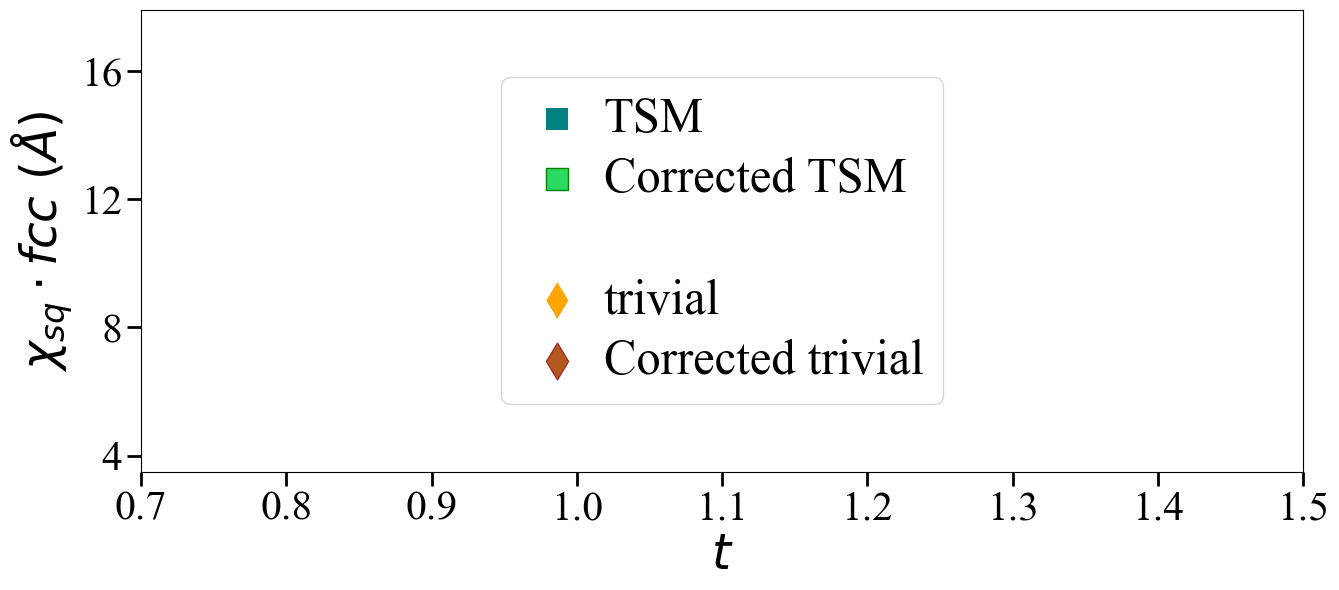

In [41]:
plt.figure(figsize=(15,6))
#plt.scatter(x0,y0,c='red',s=5)
#plt.scatter(x1,y1,c='blue',s=5)
plt.rcParams['font.family']='Times New Roman'
ax=plt.gca()


plt.scatter(1000,1000,c='teal',s=250,alpha=1,edgecolor='none',marker='s',label='TSM')
plt.scatter(1000,1000,c='#2adb62',alpha=1,  s=250, marker='s',edgecolor='green',label='Corrected TSM')
plt.scatter(1000,1000,c='#2adb62',alpha=1,  s=0, marker=None,edgecolor='green',label=' ')

plt.scatter(1000,1000,c='orange',s=350,alpha=1, edgecolor='none',marker='d',label='trivial')
plt.scatter(1000,1000,c='#b3591d',alpha=1,  s=350, marker='d',edgecolor='brown',label='Corrected trivial')


#plt.scatter([0.8],[14],c='#2adb62',alpha=1, zorder=2, s=80, marker='*')
#plt.text(0.8,14.5,'TSM',size=20,color='teal')
#plt.text(0.8,13.8,'Trivial',size=20,color='orange')

plt.xlabel(r'$t$',size=35)
plt.ylabel(r'$\chi_{sq}\cdot fcc~ (\AA)$',size=35)
plt.yticks(np.arange(4,16.1,4),size=30)
plt.tick_params(length=10, width=2, labelsize=30)
plt.ylim([3.5,17.9])
plt.xlim([0.7,1.5])

plt.legend(frameon=True,fontsize=35,ncols=1,labelspacing=0.3,handlelength=1.5,handletextpad=0.2,borderaxespad=0.01,loc='center')

#plt.show()
plt.savefig(r'Corrected_TSMs_legend.svg',bbox_inches='tight',transparent='true')
print(len(X1)+len(X0),'data points')
#print(count1, count0)

# Support vector machine on corrected 2d scatter


In [3]:
import pandas as pd

# 读取 Excel 文件
df = pd.read_excel("../P4-nmm_TSM-list_labelingsystem.xlsx", header=None)

# 提取第二列（B列）和第16列（P列），从第3行开始（Python 索引从0开始，所以是 index 2）
compound_names = df.iloc[2:, 1].astype(str).values
labeling_methods = df.iloc[2:, 16].values

# 构建compound -> labeling_method 的映射字典
compound_to_method = dict(zip(compound_names, labeling_methods))

# 假设你已经有两个列表 mat0 和 mat1，比如：
# mat0 = ['ABC', 'DEF', 'GHI']
# mat1 = ['JKL', 'MNO', 'PQR']

# 提取对应的labeling method
labeling_method0 = [compound_to_method[mat] for mat in mat0 if mat in compound_to_method]
labeling_method1 = [compound_to_method[mat] for mat in mat1 if mat in compound_to_method]

# 统计百分比
def compute_percentage(method_list):
    counts = pd.Series(method_list).value_counts(normalize=True) * 100
    return counts.sort_index().to_frame(name="percentage")

# 计算并打印结果
print("Label = 0:")
print(compute_percentage(labeling_method0))

print("\nLabel = 1:")
print(compute_percentage(labeling_method1))

Label = 0:
   percentage
1   19.204152
2   18.685121
3   23.010381
4   39.100346

Label = 1:
   percentage
2   26.910299
3   32.890365
4   40.199336


In [4]:
labeling_method_all=labeling_method0+labeling_method1
print(compute_percentage(labeling_method_all))

   percentage
1   12.627986
2   21.501706
3   26.393629
4   39.476678


In [5]:
#print(list(labeling_methods))
label_counts = labeling_methods.value_counts(normalize=True) * 100

# 将结果排序并转成 DataFrame 方便查看
label_percentages = label_counts.sort_index().to_frame(name="percentage")
label_percentages.index.name = "labeling_method"

# 打印结果
print(label_percentages)


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [6]:
x1x_dft, x1x_lit, x1x_ges=[], [], []
x1y_dft, x1y_lit, x1y_ges=[], [], []

x0x_dft, x0x_lit, x0x_ges=[], [], []
x0y_dft, x0y_lit, x0y_ges=[], [], []

count1=0
count0=0
print('')
for i in range(len(X1)):
    if labeling_method1[i]==1 or labeling_method1[i]==2:
        x1x_dft.append(X1[i][7]/X1[i][8])
        x1y_dft.append(X1[i][2]*X1[i][9])
    elif labeling_method1[i]==3:
        x1x_lit.append(X1[i][7]/X1[i][8])
        x1y_lit.append(X1[i][2]*X1[i][9])
    elif labeling_method1[i]==4:
        x1x_ges.append(X1[i][7]/X1[i][8])
        x1y_ges.append(X1[i][2]*X1[i][9])
    
    
print('')
count=0
for i in range(len(X0)):
    if labeling_method0[i]==1 or labeling_method0[i]==2:
        x0x_dft.append(X0[i][7]/X0[i][8])
        x0y_dft.append(X0[i][2]*X0[i][9])
    elif labeling_method0[i]==3:
        x0x_lit.append(X0[i][7]/X0[i][8])
        x0y_lit.append(X0[i][2]*X0[i][9])
    elif labeling_method0[i]==4:
        x0x_ges.append(X0[i][7]/X0[i][8])
        x0y_ges.append(X0[i][2]*X0[i][9])

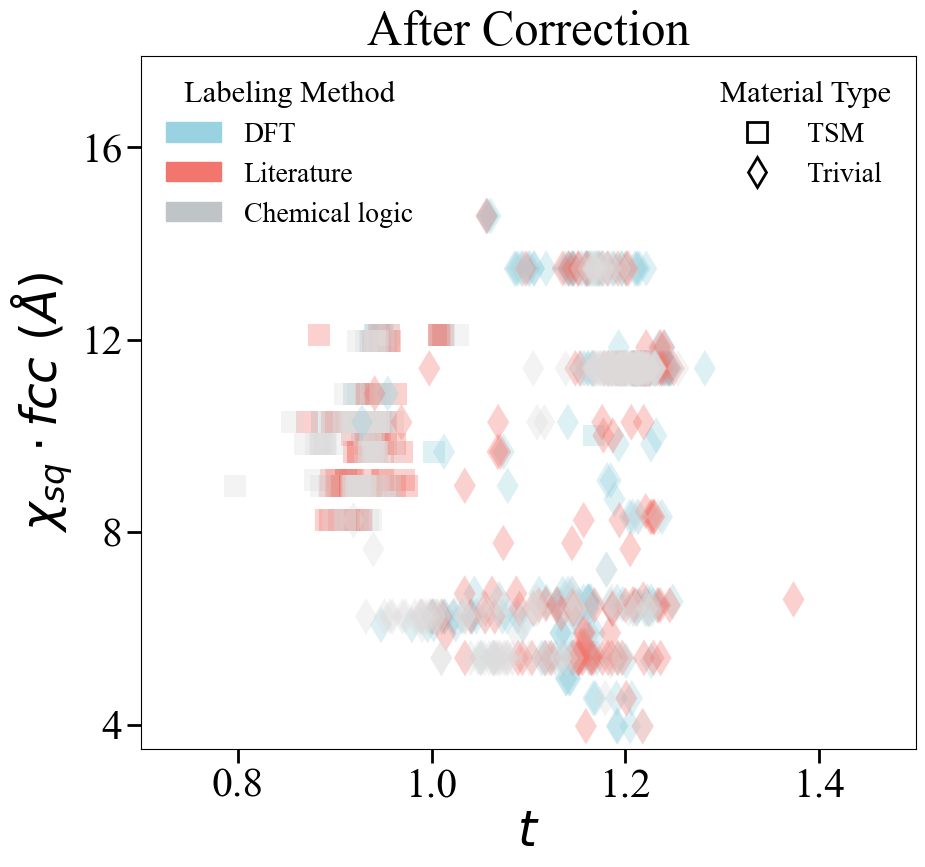

In [13]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

plt.figure(figsize=(10, 9))
plt.rcParams['font.family'] = 'Times New Roman'
ax = plt.gca()

# --- Scatter points（你已有的代码） ---
plt.scatter(x1x_dft,x1y_dft,c='#99d2e0',s=250,alpha=1/3,zorder=1,edgecolor='none',marker='s')
plt.scatter(x1x_lit,x1y_lit,c='#f2766d',s=250,alpha=1/3,zorder=1,edgecolor='none',marker='s')
plt.scatter(x1x_ges,x1y_ges,c='#dedcdc',s=250,alpha=1/3,zorder=1,edgecolor='none',marker='s')
plt.scatter(x0x_dft,x0y_dft,c='#99d2e0',s=350,alpha=1/3, edgecolor='none',marker='d')
plt.scatter(x0x_lit,x0y_lit,c='#f2766d',s=350,alpha=1/3, edgecolor='none',marker='d')
plt.scatter(x0x_ges,x0y_ges,c='#dedcdc',s=350,alpha=1/3, edgecolor='none',marker='d')

# --- Legend handles for material type (TSM vs Trivial) ---
square_patch = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
                             markerfacecolor='none', markersize=15, markeredgewidth=2, label='TSM')

diamond_patch = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
                              markerfacecolor='none', markersize=15, markeredgewidth=2, label='Trivial')

# --- Legend handles for labeling method (color patches) ---
dft_patch = mpatches.Patch(color='#99d2e0', label='DFT')
lit_patch = mpatches.Patch(color='#f2766d', label='Literature')
guess_patch = mpatches.Patch(color='#bfc5c7', label='Chemical logic')

# --- Create legends ---
legend1 = ax.legend(handles=[square_patch, diamond_patch],
                    title='Material Type',
                    loc='upper right', fontsize=20, title_fontsize=22, frameon=False)

legend2 = ax.legend(handles=[dft_patch, lit_patch, guess_patch],
                    title='Labeling Method',
                    loc='upper left', fontsize=20, title_fontsize=22, frameon=False)

# 添加第一个 legend 后添加第二个
ax.add_artist(legend1)

# --- Axis, label, title, ticks ---
plt.xlabel(r'$t$', size=35)
plt.ylabel(r'$\chi_{sq}\cdot fcc~ (\AA)$', size=35)
plt.title(r'After Correction', size=35)
plt.yticks(np.arange(4, 16.1, 4), size=30)
plt.tick_params(length=10, width=2, labelsize=30)
plt.ylim([3.5, 17.9])
plt.xlim([0.7, 1.5])

plt.savefig('labeling_method_2d_scatter.svg', bbox_inches='tight', transparent=True)
